In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [2]:
data = pd.read_csv("heart.csv")
data.head(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


In [3]:
data.info()
print("\n data size:",data.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  Target          918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

 data size: 11016


# Exploratary Data Analysis

In [4]:
df=data
categorical_val = []
continous_val = []

In [5]:
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

[]

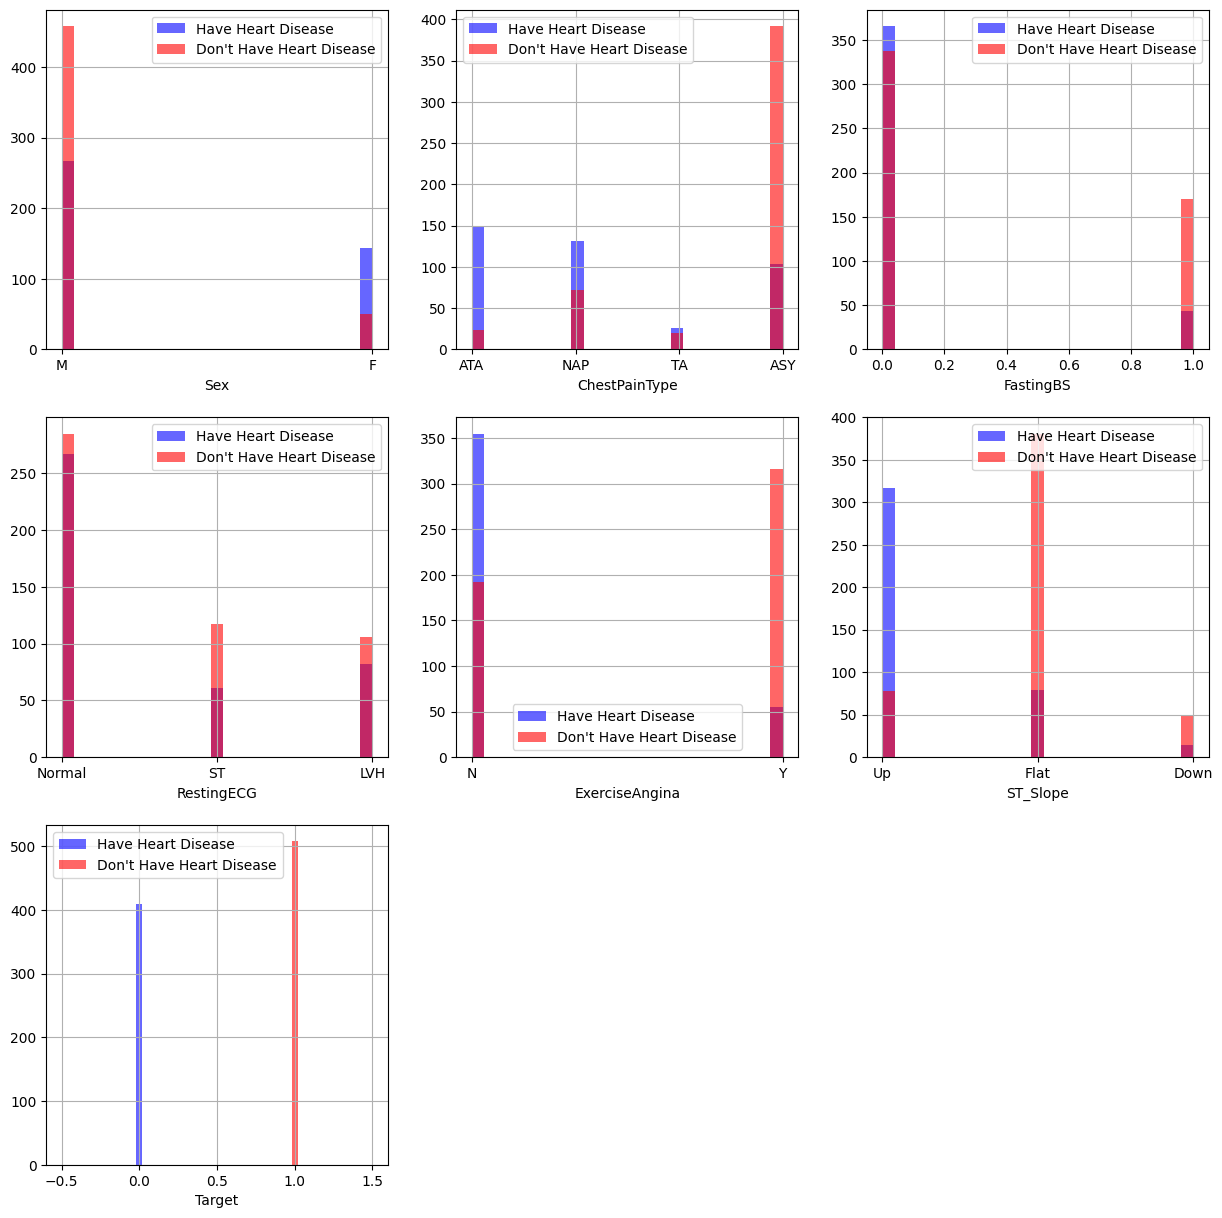

In [6]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["Target"] == 0][column].hist(bins=25, color='blue', label="Don't Have Heart Disease", alpha=0.6)
    df[df["Target"] == 1][column].hist(bins=25, color='red', label=" Have Heart Disease", alpha=0.6)
    plt.legend()
    plt.xlabel(column)
plt.plot()

[]

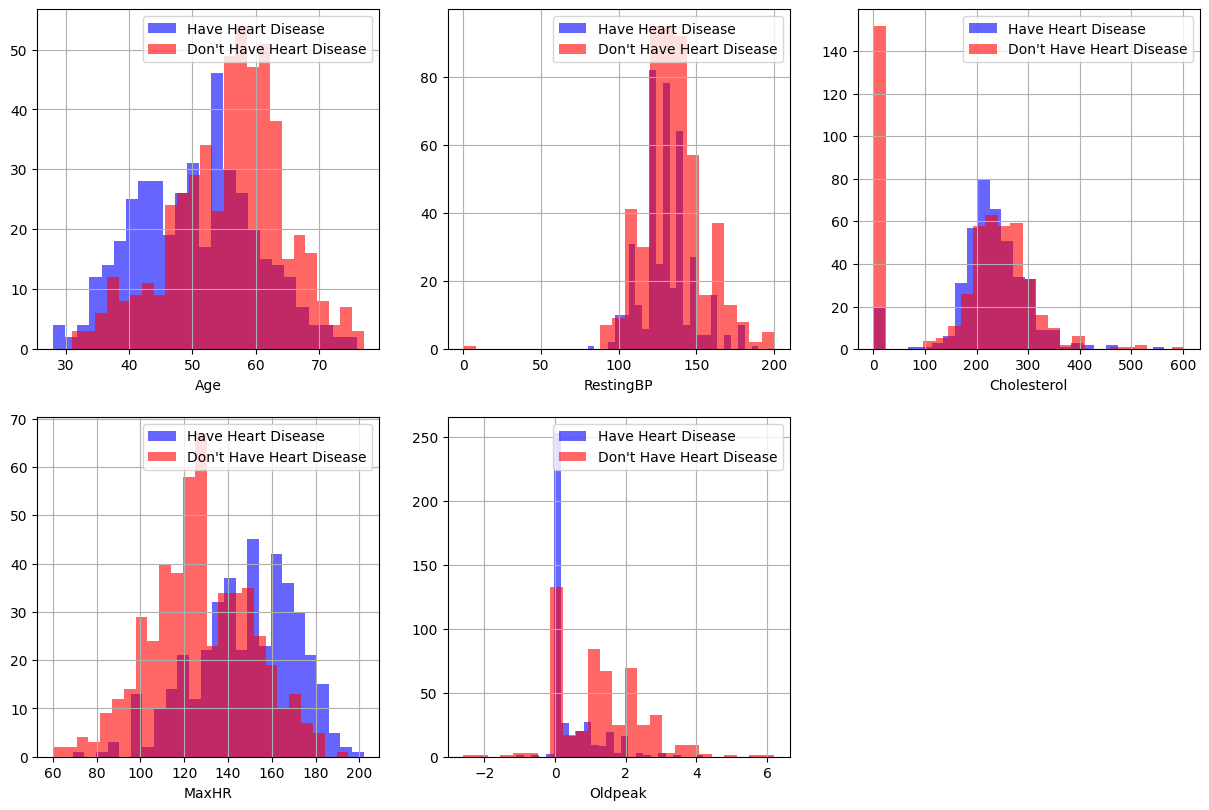

In [7]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 3, i)
    df[df["Target"] == 0][column].hist(bins=25, color='blue', label='Have Heart Disease', alpha=0.6)
    df[df["Target"] == 1][column].hist(bins=25, color='red', label="Don't Have Heart Disease", alpha=0.6)
    plt.legend()
    plt.xlabel(column)
plt.plot()

In [8]:
df['ExerciseAngina']=df['ExerciseAngina'].map({'N':0,'Y':1})
df['RestingECG']=df['RestingECG'].map({'Normal':0,'ST':1,'LVH':2})
df['Sex'] = df['Sex'].map({'F':0,'M':1})
df['ChestPainType']=df['ChestPainType'].map({'ATA':0, 'NAP':1,'ASY':2 ,'TA':3})
df['ST_Slope']=df['ST_Slope'].map({'Up':0,'Flat':1,'Down':2})
df['Oldpeak'] = df['Oldpeak'].astype(int)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,40,1,0,140,289,0,0,172,0,0,0,0
1,49,0,1,160,180,0,0,156,0,1,1,1
2,37,1,0,130,283,0,1,98,0,0,0,0
3,48,0,2,138,214,0,0,108,1,1,1,1
4,54,1,1,150,195,0,0,122,0,0,0,0


In [9]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
Age,1.000000,0.055750,0.214164,0.254399,-0.095282,0.198039,0.213152,-0.382045,0.215793,0.222111,0.268264,0.282039
Sex,0.055750,1.000000,0.179766,0.005133,-0.200092,0.120076,-0.018343,-0.189186,0.190664,0.107969,0.150693,0.305445
ChestPainType,0.214164,0.179766,1.000000,0.075332,-0.130997,0.155111,0.112067,-0.273076,0.324049,0.278211,0.352364,0.459017
RestingBP,0.254399,0.005133,0.075332,1.000000,0.100893,0.070193,0.097661,-0.112135,0.155101,0.158705,0.075162,0.107589
Cholesterol,-0.095282,-0.200092,-0.130997,0.100893,1.000000,-0.260974,0.112095,0.235792,-0.034166,0.043229,-0.111471,-0.232741
FastingBS,0.198039,0.120076,0.155111,0.070193,-0.260974,1.000000,0.050707,-0.131438,0.060451,0.041421,0.175774,0.267291
RestingECG,0.213152,-0.018343,0.112067,0.097661,0.112095,0.050707,1.000000,0.048552,0.036119,0.084853,0.078807,0.061011
MaxHR,-0.382045,-0.189186,-0.273076,-0.112135,0.235792,-0.131438,0.048552,1.000000,-0.370425,-0.165156,-0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,0.324049,0.155101,-0.034166,0.060451,0.036119,-0.370425,1.000000,0.396723,0.428706,0.494282
Oldpeak,0.222111,0.107969,0.278211,0.158705,0.043229,0.041421,0.084853,-0.165156,0.396723,1.000000,0.488129,0.392385


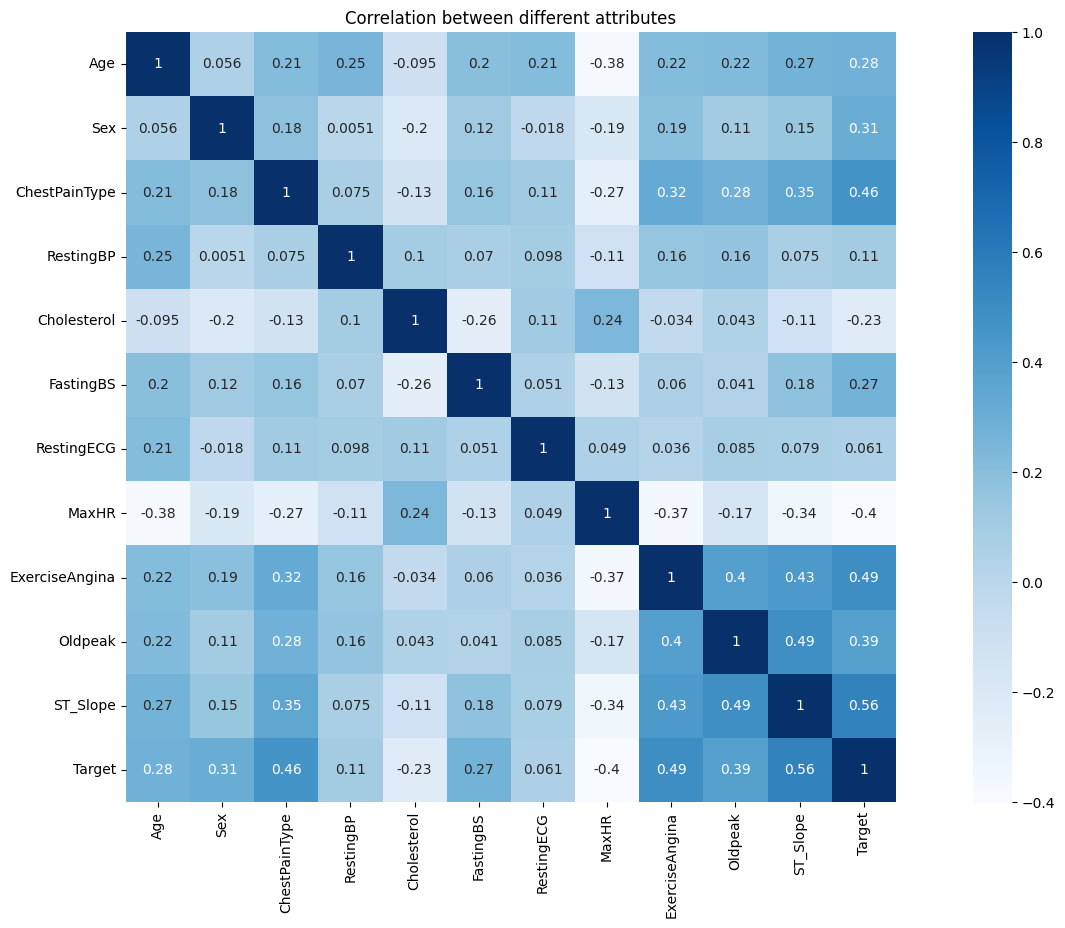

In [10]:
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

In [11]:
#Correlation with output variable
cor_target = abs(cor["Target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

Age               0.282039
Sex               0.305445
ChestPainType     0.459017
RestingBP         0.107589
Cholesterol       0.232741
FastingBS         0.267291
RestingECG        0.061011
MaxHR             0.400421
ExerciseAngina    0.494282
Oldpeak           0.392385
ST_Slope          0.558771
Target            1.000000
Name: Target, dtype: float64

# Training and Testing Datasets over Several Model

In [12]:
#Split the data into predictor variables and target variable, following by breaking them into train and test sets. 
Y = df['Target'].values
X = df.drop(['Target'], axis=1).values
# standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.25,random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(688, 11) (230, 11) (688,) (230,)


In [13]:
# Define models to train
models= []
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('LGR', LogisticRegression()))
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model: Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

For CART Model: Mean accuracy is 0.764429 (Std accuracy is 0.029071)
For SVM Model: Mean accuracy is 0.863321 (Std accuracy is 0.037088)
For NB Model: Mean accuracy is 0.853112 (Std accuracy is 0.027609)
For KNN Model: Mean accuracy is 0.863363 (Std accuracy is 0.018684)
For LGR Model: Mean accuracy is 0.860465 (Std accuracy is 0.021686)


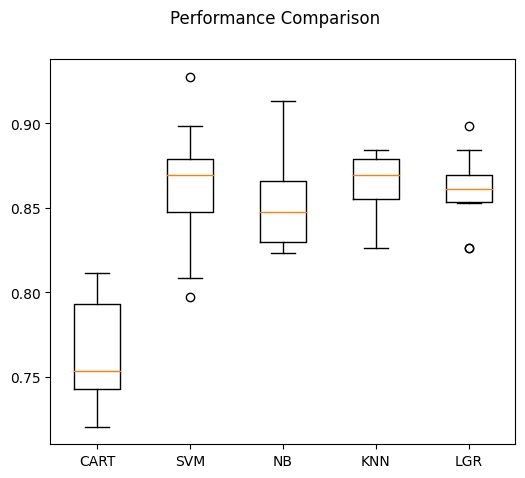

In [14]:
fig = plt.figure(figsize=(6,5))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [15]:
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print("\nModel:",name)
    print("Accuracy score:",accuracy_score(Y_test, predictions))
    print("Classification report:\n",classification_report(Y_test, predictions))    


Model: CART
Accuracy score: 0.8130434782608695
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76        92
           1       0.84      0.86      0.85       138

    accuracy                           0.81       230
   macro avg       0.81      0.80      0.80       230
weighted avg       0.81      0.81      0.81       230


Model: SVM
Accuracy score: 0.8478260869565217
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.80        92
           1       0.85      0.91      0.88       138

    accuracy                           0.85       230
   macro avg       0.85      0.83      0.84       230
weighted avg       0.85      0.85      0.85       230


Model: NB
Accuracy score: 0.8391304347826087
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79        92
           1       0.85 

Implementing SVM, As SVM model have a better accuracy among others

In [16]:
clf = SVC()

clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print("Test Accuracy:",accuracy)

predict = clf.predict(X_test)
predict

Test Accuracy: 0.8478260869565217


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [17]:
import pickle

heartmodel = SVC()
heartmodel.fit(X_train,Y_train)
pickle.dump(heartmodel,open('heartmodel.pkl','wb'))